In [1]:
#from mpmath import *
#from sympy import *
#from sympy.plotting import plot
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
#x, y, z, t = symbols('x y z t')
#k, m, n = symbols('k m n', integer=True)
#f, g, h = symbols('f g h', cls=Function)
#init_printing()
#import IPython.display
#IPython.display.set_matplotlib_formats('retina')
#%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
import matplotlib.cbook as cbook
from mpl_toolkits.axisartist import Subplot
from mpl_toolkits.axisartist import SubplotHost, ParasiteAxesAuxTrans
from mpl_toolkits.axisartist.grid_helper_curvelinear import GridHelperCurveLinear
import mpl_toolkits.axisartist.angle_helper as angle_helper
from matplotlib.projections import PolarAxes
from matplotlib.transforms import Affine2D

## Chapter 3 - Linear transformations

### $2\times2\text{ Matrix}"$

$
\begin{bmatrix}a & b \\ c & d\end{bmatrix}\begin{bmatrix}x \\ y\end{bmatrix}
= x\begin{bmatrix}a \\ c\end{bmatrix} + y\begin{bmatrix}b \\ d\end{bmatrix}
= \begin{bmatrix}ax + by \\ cx + dy\end{bmatrix}
$

$
\begin{bmatrix}a & b \\ c & d\end{bmatrix} = \begin{bmatrix} 1 & 3 \\ 2 & 1 \end{bmatrix}
$

$
\begin{bmatrix} 1 & 3 \\ 2 & 1 \end{bmatrix}
\begin{bmatrix} x \\ y \end{bmatrix}
= x \begin{bmatrix} 1 \\ 2 \end{bmatrix} + y \begin{bmatrix} 3 \\ 1 \end{bmatrix}
= \begin{bmatrix} x + 3y \\ 2x + y \end{bmatrix}
$

'yy: [11. 22.]'

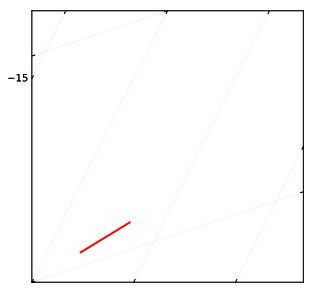

In [27]:
def curvelinear_test1(fig):
    
    def trans(x, y):
        x, y = np.asarray(x), np.asarray(y)
        return x + 3*y, 2*x + y

    def trans_inv(x, y):
        x, y = np.asarray(x), np.asarray(y)
        return x - 3*y, (x - y)/2
    
    grid_helper = GridHelperCurveLinear((trans, trans_inv),
                                        grid_locator1=None, grid_locator2=None,
                                       tick_formatter1)
    
#    gridlines = grid_helper.get_gridlines(which='minor', axis='both')

    ax1 = Subplot(fig, 1, 1, 1, grid_helper=grid_helper)
#    ax1 = Subplot(fig, 1, 1, 1)
    fig.add_subplot(ax1)
    xx, yy = trans([3, 6], [5.0, 10.])
    display('yy: {0}'.format(yy))
    ax1.plot(xx, yy, 'r-', linewidth=2.0)

    ax1.set_aspect(1.)
    ax1.set_xlim(0, 100)
    ax1.set_ylim(0, 100)

#    ax1.axis["t1"] = ax1.new_floating_axis(0, 3.)
#    ax1.axis["t2"] = ax1.new_floating_axis(1, 7.)
    major_ticks = np.arange(0, 101, 20)
    minor_ticks = np.arange(0, 101, 5)
    ax1.set_xticks(major_ticks)
    ax1.set_xticks(minor_ticks, minor=True)
    ax1.set_yticks(major_ticks)
    ax1.set_yticks(minor_ticks, minor=True)
    ax1.grid(which='minor', axis='both', alpha=0.2, linestyle='--', linewidth=.5)
#    ax1.grid(which='major', axis='both', alpha=0.5, linestyle='-', linewidth=.5)
#    ax1.legend(loc='best')
    return ax1
if 1:
    fig = plt.figure(1, figsize=(5, 5))
    curvelinear_test1(fig)
#    curvelinear_test2(fig)
    plt.show()